<a href="https://colab.research.google.com/github/SeathWR/Analisis_dedatos/blob/main/IBM_HR_Analytics_Employee_Attrition_%26_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importacion de librerias

In [1]:
!pip install -q hvplot
import hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 3.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

#Carga de archivos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')

#Análisis Exploratorio de Datos (EDA)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


En el conjunto de datos se nos presenta un grupo de empleados de diferentes compañias y diferentes roles, siendo la variable mas immportante en este caso, la renuncia de los mismos, a medida que se vaya realizando el analisis estaremos encontrando las posibles causas o variables que pueden influir en la renuncia de los empleados

##Descripcion basica de los datos

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df['Education'].sum()
df['Education'].value_counts()

,count
Education,
3,572
4,398
2,282
1,170
5,48


La gran mayoria de empleados tiene un nivel de educacion profesional, por el contrario los que tienen mayor y menor educacion se concentran en mucha menor proporcion

In [9]:
df['EnvironmentSatisfaction'].sum()
df['EnvironmentSatisfaction'].value_counts()

,count
EnvironmentSatisfaction,
3,453
4,446
2,287
1,284


In [10]:
df['JobInvolvement'].sum()
df['JobInvolvement'].value_counts()

,count
JobInvolvement,
3,868
2,375
4,144
1,83


In [11]:
df['WorkLifeBalance'].sum()
df['WorkLifeBalance'].value_counts()

,count
WorkLifeBalance,
3,893
2,344
4,153
1,80


##Nivel de satisfaccion laboral

Podemos evidenciar que los altos cargos o que requieren un nivel de edicacion superior son los que reflejan un nivel de satisfaccion mas alta y viceversa con los cargos mas bajos

In [12]:
df['JobRole'].sum()
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [13]:
more_attrition = pd.crosstab(df['JobRole'], df['Attrition'])
print(more_attrition)

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


In [14]:
pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


##Porcentaje de empleados que renuncian

Como ya se evidencio anteriormente los cargos con menos responsabilidad son los que mas tienen una tasa de renuncia, siendo estos: los representantes de ventas, los trabajadores de recursos humanos y los tecnicos de laboratorio.

Por una gran diferencia los representantes de ventas son los que mas renuncian, acontinuacion descrubriremos diferentes variables que pueden influenciar en esta decision, ya que casi el 40% de ellos se va de las empresas.

In [15]:
pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
MaritalStatus,,
Divorced,89.908257,10.091743
Married,87.518574,12.481426
Single,74.468085,25.531915


In [16]:
pd.crosstab(df['MaritalStatus'], df['JobRole'], normalize='index') * 100

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
MaritalStatus,,,,,,,,,
Divorced,10.397554,4.281346,16.819572,7.033639,11.009174,7.033639,18.960245,21.100917,3.363914
Married,9.063893,4.160475,17.236256,8.320951,9.955423,5.646360,18.127786,22.436850,5.052006
Single,7.659574,2.127660,18.723404,4.893617,8.936170,4.042553,22.978723,22.553191,8.085106


No es en una gran medida pero tambien se evidencia que los empleados solteros son los que mas renuncian, lo cual era de esperar por sus niveles de responsabilidad

In [17]:
pd.crosstab(df['EducationField'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
EducationField,,
Human Resources,74.074074,25.925926
Life Sciences,85.313531,14.686469
Marketing,77.987421,22.012579
Medical,86.422414,13.577586
Other,86.585366,13.414634
Technical Degree,75.757576,24.242424


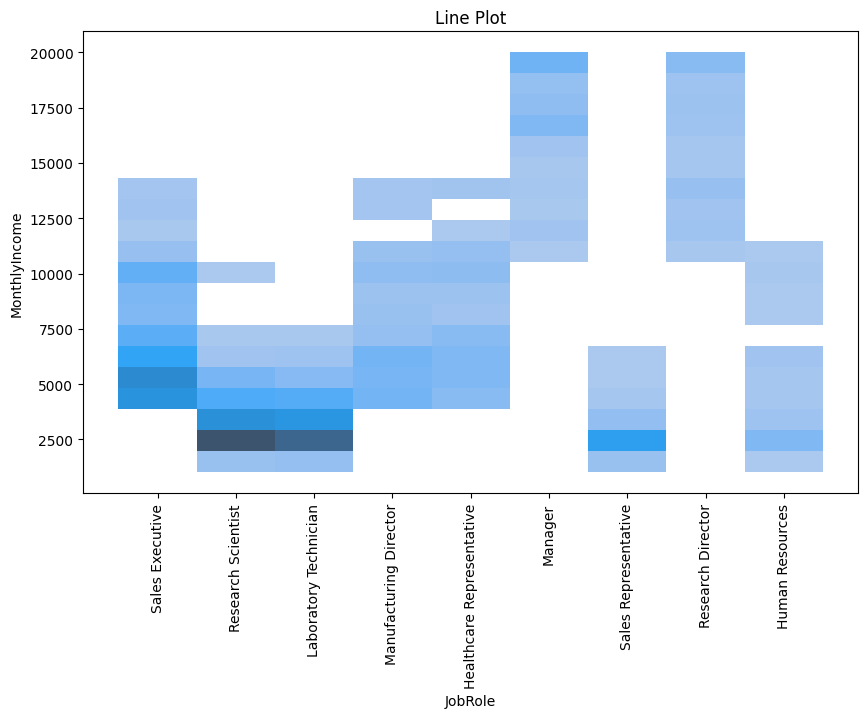

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='JobRole', y='MonthlyIncome')
plt.title('Line Plot')
plt.xticks(rotation=90)
plt.show()

No es una sorpresa que entre los salarios mas bajos se encuentren los cargos antes mencionados con mayor tasa de abandono.

##Distribucion por edad, ingreso mensual, departamento y satisfaccion laboral

<ipython-input-19-fd4d9998b635>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'], ax=axes[0, 1])
<ipython-input-19-fd4d9998b635>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['JobSatisfaction'], ax=axes[1, 1])


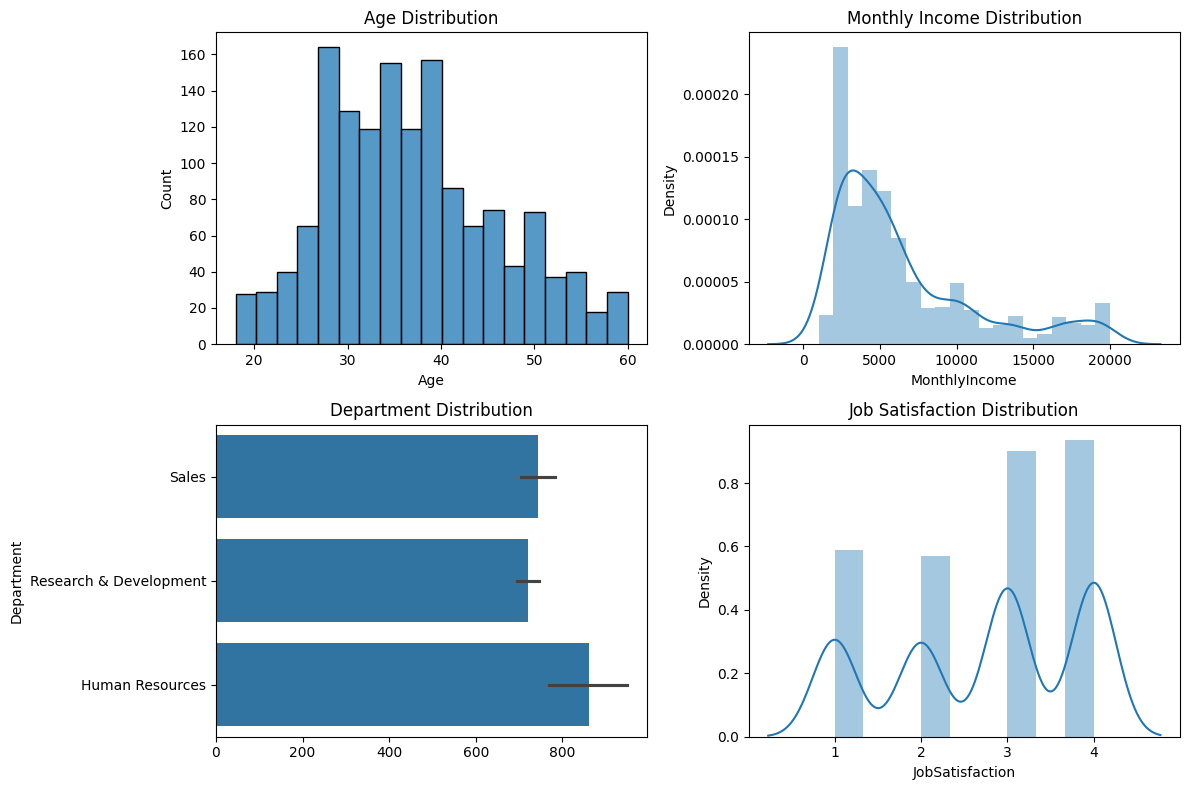

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['Age'],ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.distplot(df['MonthlyIncome'], ax=axes[0, 1])
axes[0, 1].set_title('Monthly Income Distribution')

sns.barplot(df['Department'], ax=axes[1, 0])
axes[1, 0].set_title('Department Distribution')

sns.distplot(df['JobSatisfaction'], ax=axes[1, 1])
axes[1, 1].set_title('Job Satisfaction Distribution')

plt.tight_layout()
plt.show()

Podemos ver como claramente la distribucion de la edad y del ingreso mensual es muy similiar y la gran mayoria de datos esta concentrado en la misma zona, donde entre mas edad mas salario y claramente mayor satisfaccion laboral.

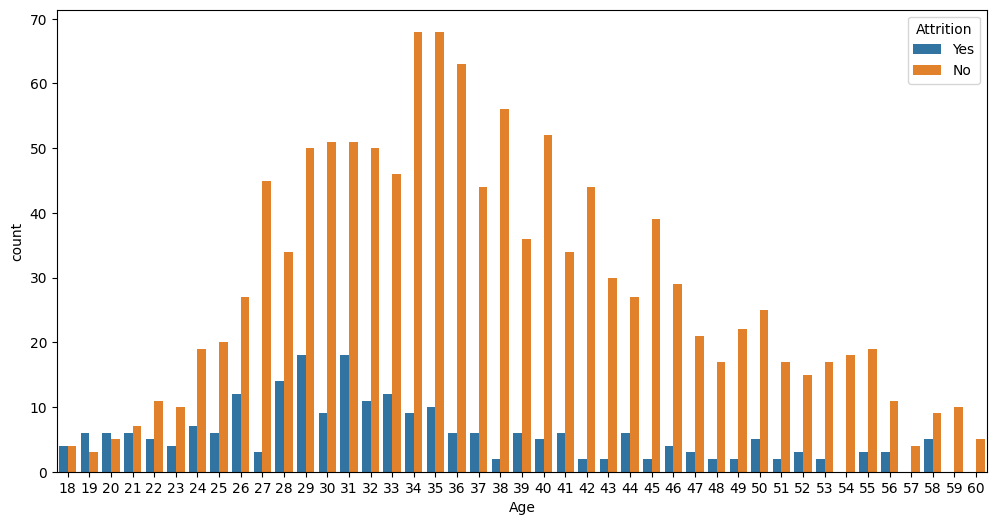

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Attrition')
plt.show()

La gran mayoria de los trabajadores se encuentran en el rango de edad entre los 30 y 40 años

Se puede evidenciar que hay una gran brecha entre los salarios siendo los salarios bajos los mas populares

No hay grandes diferencias entre la cantidad de empleados por departamentos, pero se evidencia que la mayoria son de recursos humanos

En cuanto a la satisfaccion laboral hay una tendencia positiva.

In [21]:
df_correlation = df.select_dtypes(include=[np.number])

In [22]:
corr_matrix = df_correlation.corr()

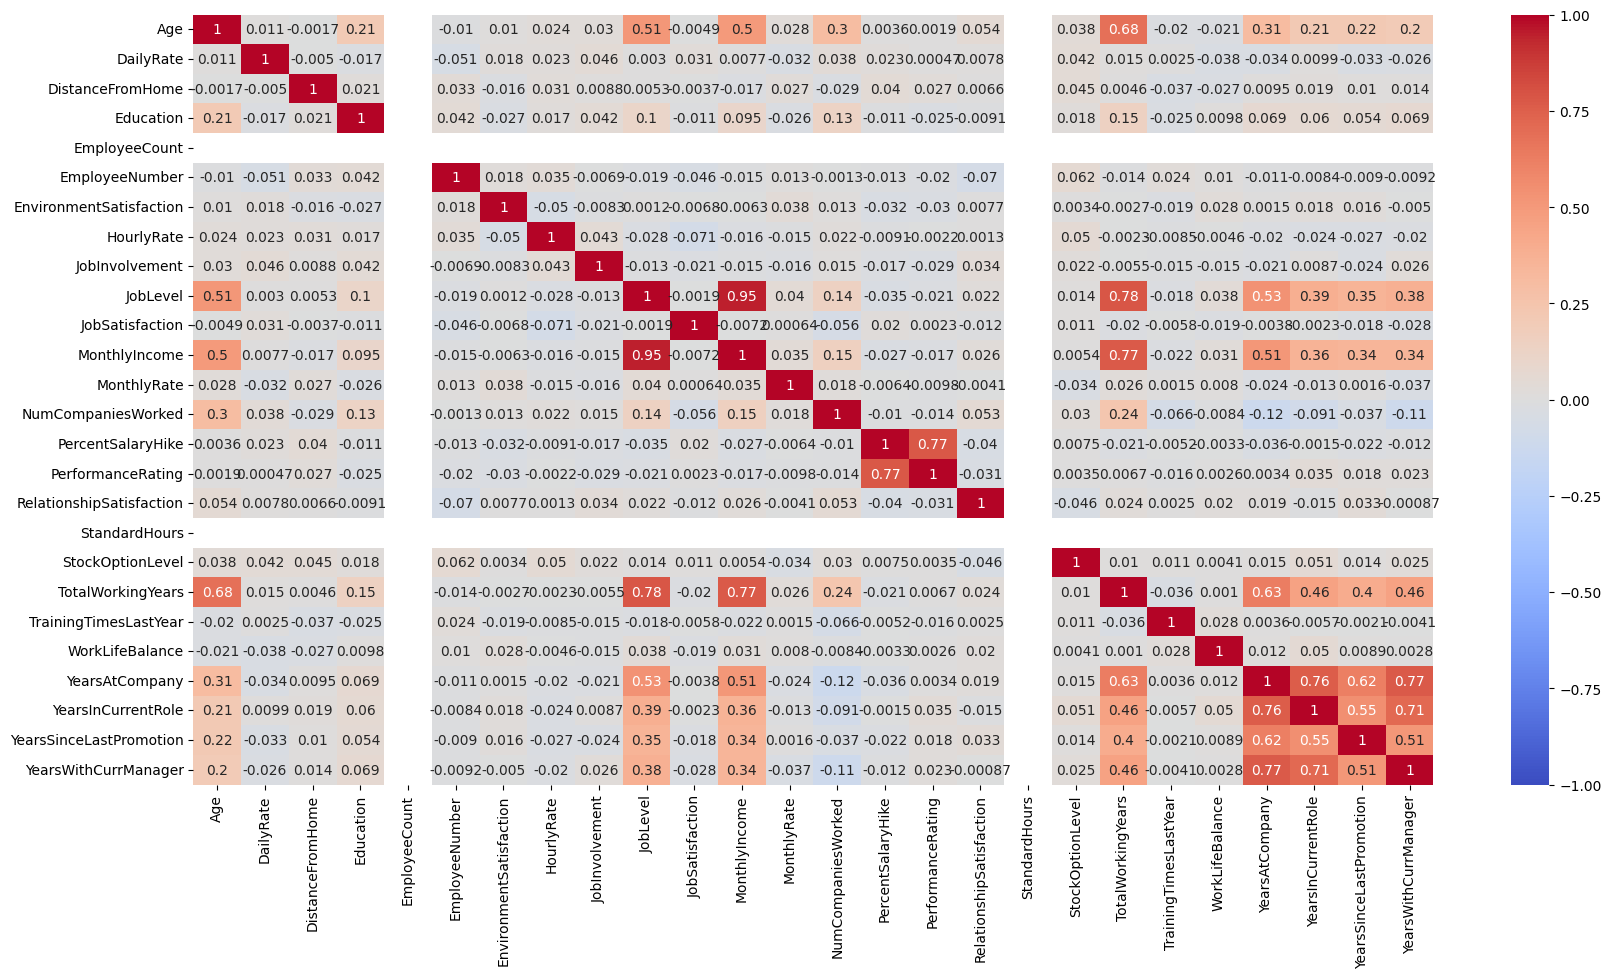

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

En el grafico de correlacion podemos ver claramente los factores que se conectan entre ellos y estos son muy similares a los mencionados anteriormente, como lo son los sueldos, el rango dentro de la empresa, las horas trabajada, adicional aca descubrimos que los años que tenga trabajado el empleado son muy relevantes en su decision de abandonar o no la compañia, entre mas experiencia tienen estos, menor probabilidad de renuncia-

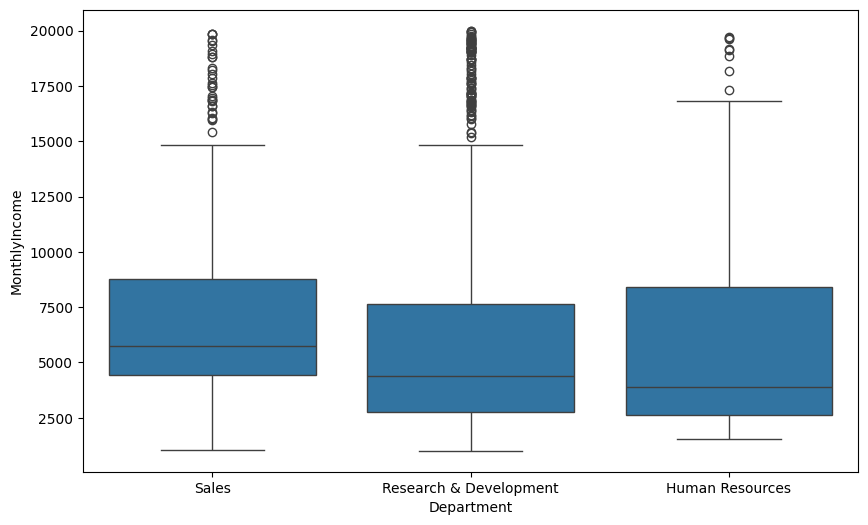

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='MonthlyIncome')
plt.show()

Si bien los salarios son algo similares entre los departamentos, se pueden ver varios valores atipicos, los cuales corresponden a empleados con edades y niveles superiores dentro de la misma.

<ipython-input-25-658c9a17f174>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette='coolwarm')


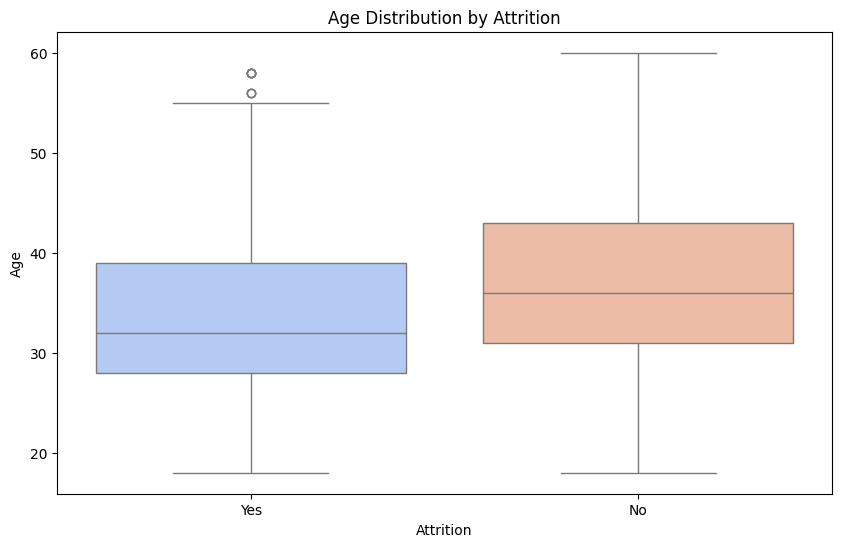

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='Age', palette='coolwarm')
plt.title('Age Distribution by Attrition')
plt.show()

Como ya se habia mencionado los empleados que renuncian se concentran en un grupo de edad especifico entre los 28 y los 39, tambien es la edad en donde mas posibilidad de cambiar de trabajo hay, por el; por el contrario muy pocos son los empleados que renuncian fuera de este rango de edad, ya casi cerca de su pension.

<ipython-input-26-0a61f57da23a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')


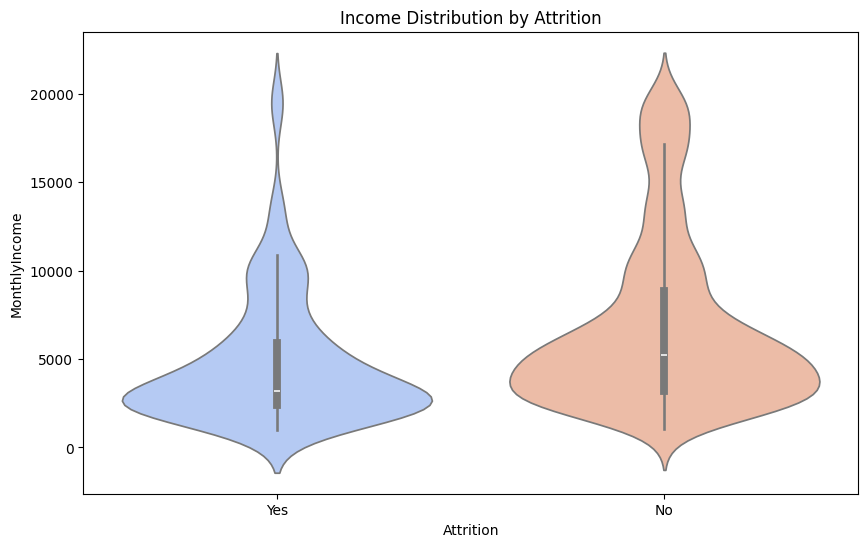

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')
plt.title('Income Distribution by Attrition')
plt.show()

No hay una diferencia tan marcada entre los sueldos de los que renuncian y los que no lo hacen, sin embargo si hay mayor concentracion con los sueldos inferiores a los 5000.

<ipython-input-43-28dc2e34a3e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Attrition', y='JobLevel', palette='coolwarm')


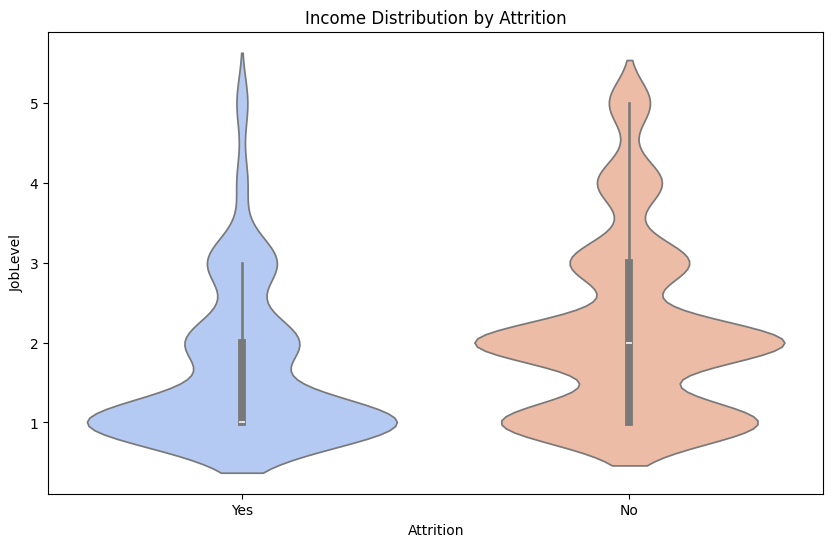

In [43]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition', y='JobLevel', palette='coolwarm')
plt.title('Income Distribution by Attrition')
plt.show()

En el grafico se puede evidenciar mucho mejor como son los empleados con un cargo de menor nivel los que estan mas propensos a renunciar, locual esta directamente relacionado con sus niveles de estudio, edad y salarios.

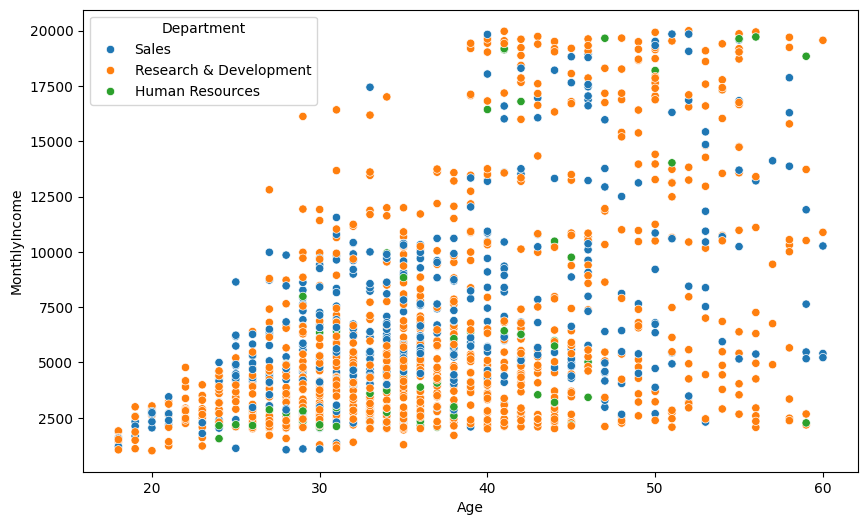

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Department')
plt.show()

La distribucion de salarios en ventas es la mas variable, es decir que sin importar la edad pueden ganar menos de 5000 o mas de 15000, lo cual indica que si bien son el departamento que mas renuncia a causa de esto, pero no es una razon definitiva ya que depende del nivel de cada empleado.

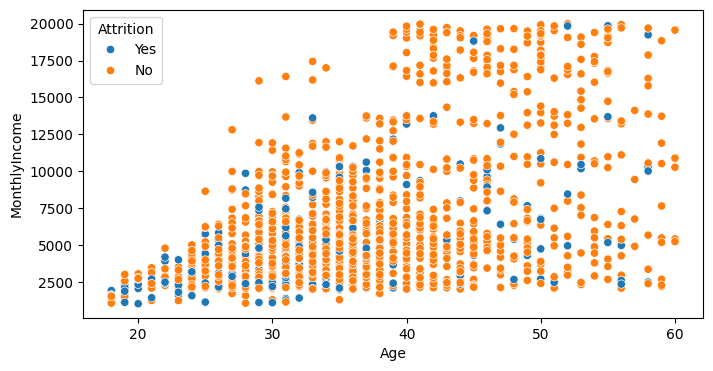

In [28]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Attrition')
plt.show()

En este podemos evidenciar mucho mas claro lo anterior mencionado.

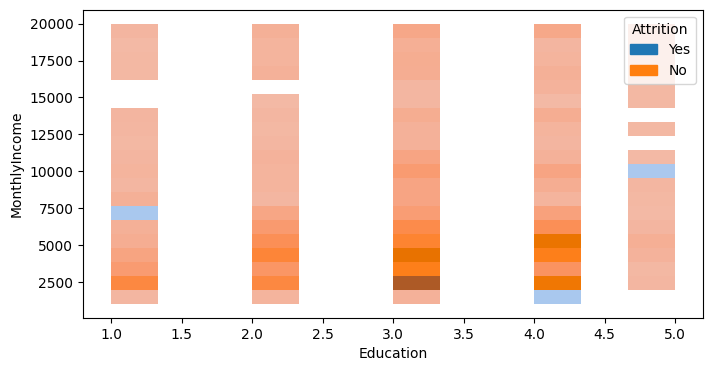

In [29]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Education', y='MonthlyIncome', hue='Attrition')
plt.show()

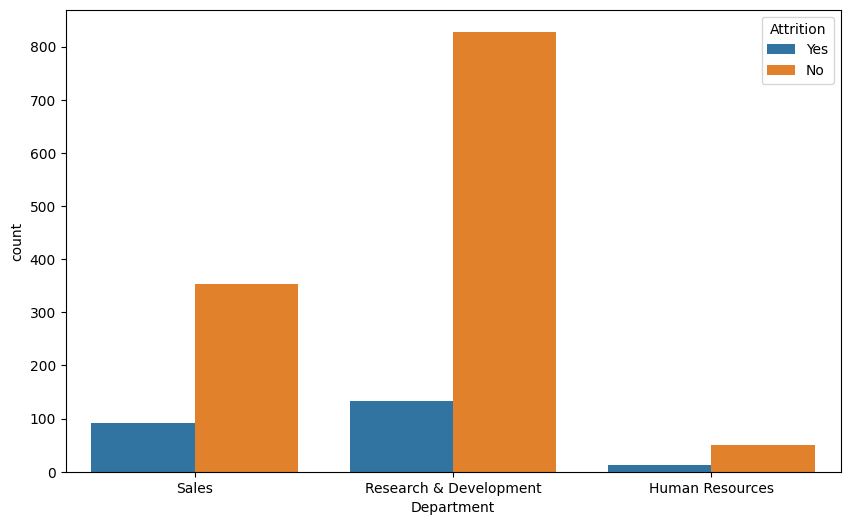

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.show()

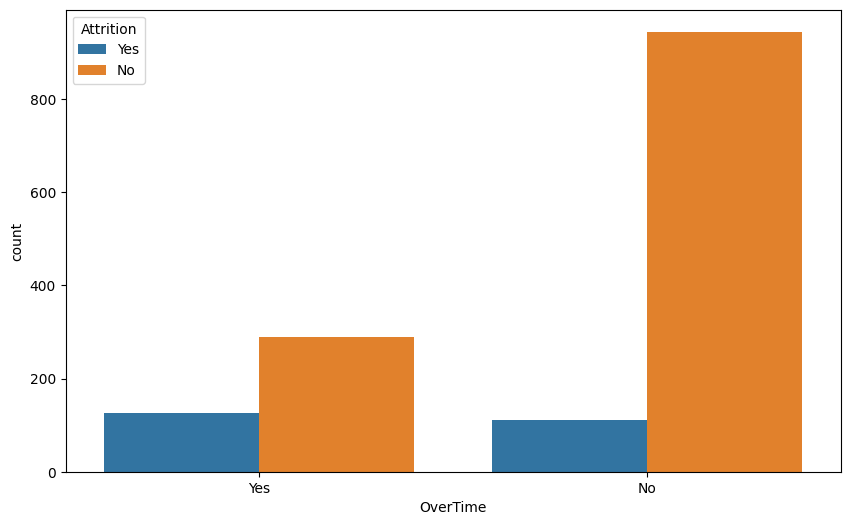

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.show()

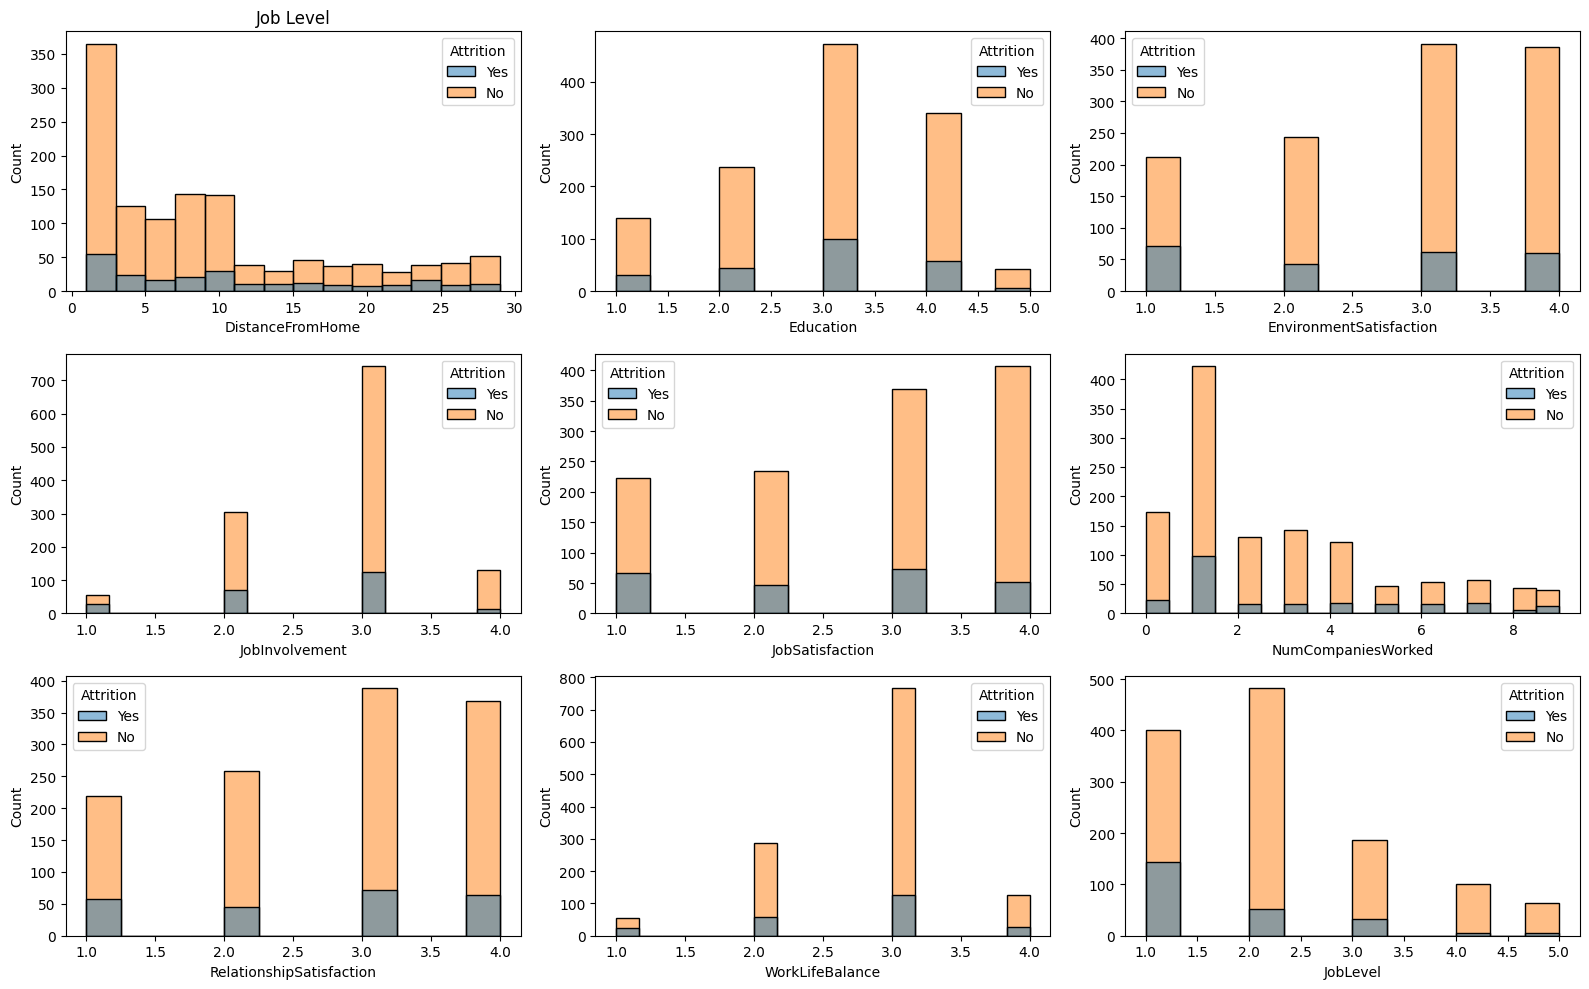

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

sns.histplot(data=df, x='DistanceFromHome', hue='Attrition',ax=axes[0, 0])
axes[0, 0].set_title('Distance From Home')

sns.histplot(data=df, x='Education', hue='Attrition',ax=axes[0, 1])
axes[0, 0].set_title('Distribution por educacion')

sns.histplot(data=df, x='EnvironmentSatisfaction', hue='Attrition',ax=axes[0, 2])
axes[0, 0].set_title('Environment Satisfaction')

sns.histplot(data=df, x='JobInvolvement', hue='Attrition',ax=axes[1, 0])
axes[0, 0].set_title('Job Involvement')

sns.histplot(data=df, x='JobSatisfaction', hue='Attrition',ax=axes[1, 1])
axes[0, 0].set_title('Job Satisfaction')

sns.histplot(data=df, x='NumCompaniesWorked', hue='Attrition',ax=axes[1, 2])
axes[0, 0].set_title('NumCompaniesWorked')

sns.histplot(data=df, x='RelationshipSatisfaction', hue='Attrition',ax=axes[2, 0])
axes[0, 0].set_title('Relationship Satisfaction')

sns.histplot(data=df, x='WorkLifeBalance', hue='Attrition',ax=axes[2, 1])
axes[0, 0].set_title('Work Life Balance')

sns.histplot(data=df, x='JobLevel', hue='Attrition',ax=axes[2, 2])
axes[0, 0].set_title('Job Level')

plt.tight_layout()
plt.show()




Se estudiaron diferentes variables, encontrando que no son tan influyentes en la decision final del empleado, como las que ya sabiamos anteriormente, es una sorpresa que la distancia al trabajo no sea una variable demasiado influyente, posiblemente por el trabajo remoto.

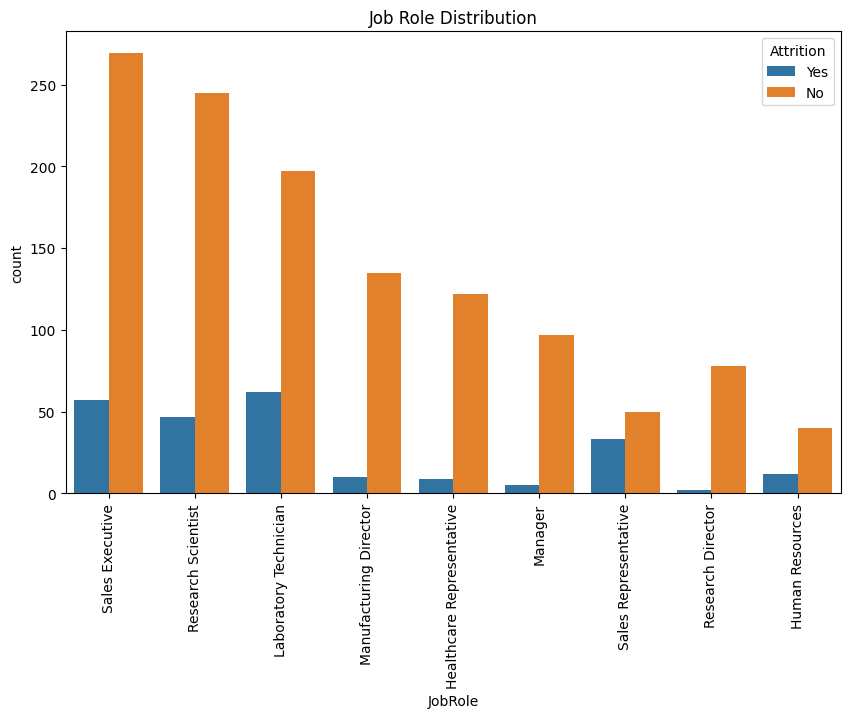

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title('Job Role Distribution')
plt.xticks(rotation=90)
plt.show()

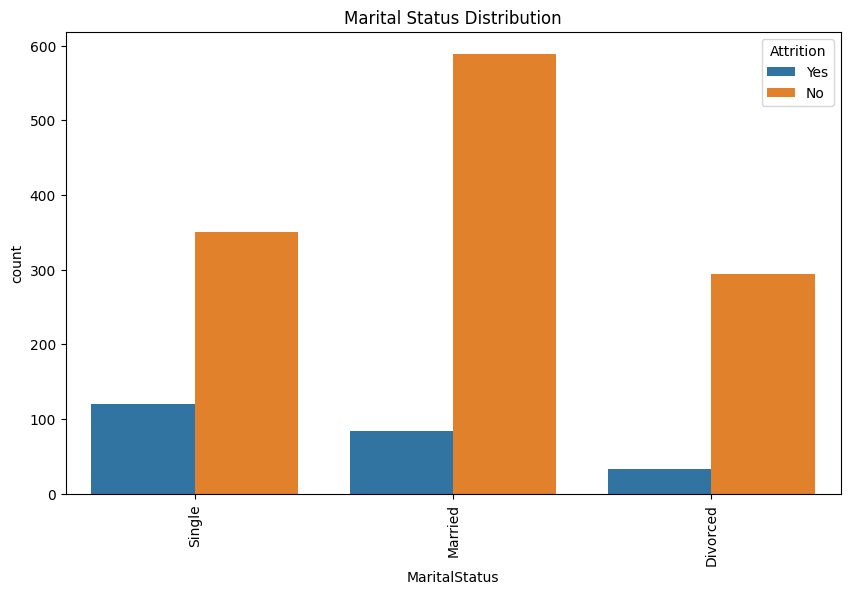

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Marital Status Distribution')
plt.xticks(rotation=90)
plt.show()

<Figure size 1400x600 with 0 Axes>

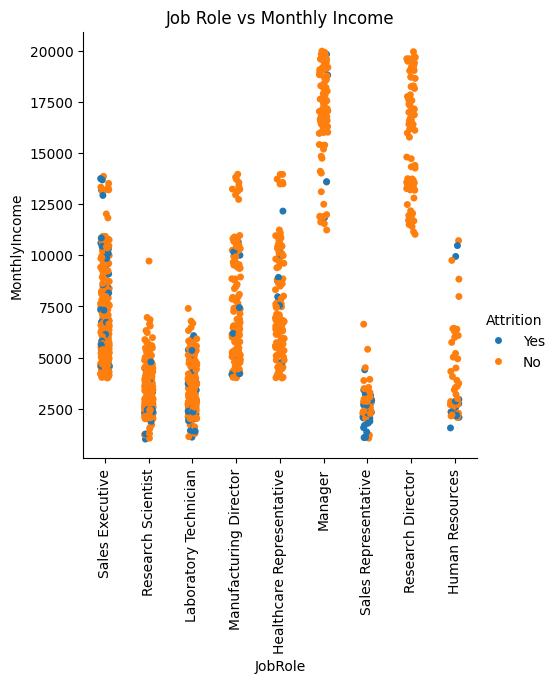

In [35]:
plt.figure(figsize=(14, 6))
sns.catplot(data=df, x='JobRole', y='MonthlyIncome', hue='Attrition')
plt.title('Job Role vs Monthly Income')
plt.xticks(rotation=90)
plt.show()

Los cargos con mas renuncias, por diferentes variables asociadas, con mas renuncias con las que estab relacionadas con ventas y de cierta medida tambien con los bajos ingresos.

#Modelos de prediccion

##Regresion Logistica

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [37]:
X = df[['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','NumCompaniesWorked','RelationshipSatisfaction','JobLevel','MonthlyIncome','Age','MonthlyRate']]
y = df['Attrition'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred_rf))

Precisión: 0.8673469387755102


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, y_pred_rf))

# Reporte de clasificación (precision, recall, f1-score)
print(classification_report(y_test, y_pred_rf))


[[252   3]
 [ 36   3]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294



##Pobabilidades de que un empleado renuncie basado en su cargo y el nivel de su cargo dentro de la compañia

In [39]:
df['ProbRetir'] = modelo_rf.predict_proba(X)[:, 1]
print(df[['ProbRetir','JobRole']].head())
print(df[['ProbRetir','JobLevel']].head())

   ProbRetir                JobRole
0       0.72        Sales Executive
1       0.05     Research Scientist
2       0.77  Laboratory Technician
3       0.13     Research Scientist
4       0.13  Laboratory Technician
   ProbRetir  JobLevel
0       0.72         2
1       0.05         2
2       0.77         1
3       0.13         1
4       0.13         1


#Conclusiones

El modelo construido tiene una precision de casi el 90%.
Podemos concluir que badado en el nivel de su cargo dentro de la empresa, los empleados qur tienen mas probabilidad de renuncia son los del nivel 1 y 2

Y los cargos que mas tienen esta probabilidad como lo evidenciamos anteriormente, son los ejecutivos de ventas y los tecnicos de laboratorio, ambos con condiciones similares de sueldo y nivel dentro de la compañia.